# Chapter 3 - Classification

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist["data"], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [8]:
some_digit = X[36000]

In [9]:
some_digit_image = some_digit.reshape(28,28)

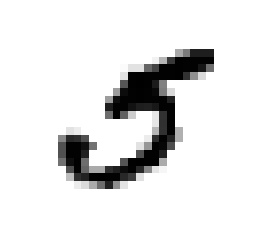

In [10]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [11]:
y[36000]

5.0

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
import numpy as np

In [14]:
shuffle_index = np.random.permutation(60000)

In [15]:
shuffle_index

array([18123,  8050, 38559, ...,  2199, 15399, 51871])

In [16]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier

In [17]:
y_train_5 = (y_train ==5)

In [18]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [19]:
y_test_5 = (y_test == 5)

In [20]:
y_test_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd_clf = SGDClassifier(random_state=42).fit(X_train,y_train_5)

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [23]:
sgd_clf.predict([some_digit])

array([False], dtype=bool)

### Manually Creating Cross Validation

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [25]:
skfold = StratifiedKFold(n_splits=3, random_state=42)

In [26]:
for train_index, test_index in skfold.split(X_train, y_train_5):
    print(train_index, test_index)
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    print('TE',y_pred, y_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

[19998 19999 20000 ..., 59997 59998 59999] [    0     1     2 ..., 19997 20019 20020]


/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


TE [False False False ..., False  True  True] [False False False ..., False  True  True]
0.95475
[    0     1     2 ..., 59997 59998 59999] [19998 19999 20000 ..., 40238 40244 40282]


/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


TE [False False False ...,  True  True  True] [False False False ...,  True  True  True]
0.9338
[    0     1     2 ..., 40238 40244 40282] [39978 39979 39980 ..., 59997 59998 59999]


/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


TE [False False False ..., False False False] [False False False ..., False False False]
0.96215


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(

array([ 0.95475,  0.9338 ,  0.96215])

In [29]:
from sklearn.base import BaseEstimator

In [30]:
class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1),dtype=bool)

In [31]:
never_5_clf = Never5Classifier()

In [32]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.90975,  0.91055,  0.90865])

### Confusion Matrix

In [33]:
from sklearn.model_selection import cross_val_predict

In [34]:
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_train_5, y_train_predict)

array([[52328,  2251],
       [  735,  4686]])

In [37]:
import matplotlib.pyplot as plt

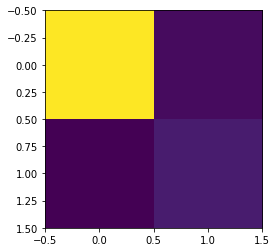

In [38]:
plt.imshow(confusion_matrix(y_train_5, y_train_predict))

### Precision

$$ precision = \frac{TP}{TP + FP} $$

### Recall

$$ recall = \frac{TP}{TP+FN}$$

In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
#Args: Actual Label and Prediction
score = precision_score(y_train_5, y_train_predict)

check = 4344 / ( 4344+1307)
print('CHECK: ', check)
print('SCORE: ', score)

CHECK:  0.7687135020350381
SCORE:  0.675508144731


In [41]:
#Args: Actual Label and Prediction
score = recall_score(y_train_5, y_train_predict)
check = 4344 / (4344+1077)

print('CHECK: ', check)
print('SCORE: ', score)

CHECK:  0.801328168234643
SCORE:  0.86441615938


### F1 Score

\begin{align}
F_1 & = \frac{2}{\frac{1}{precision}+\frac{1}{recall}} \\ \\
F_1 & = \frac{precision \times recall}{precision + recall} \\ \\
F_1 & = \frac{TP}{TP + \frac{FN + FP}{2}}
\end{align}

In [42]:
from sklearn.metrics import f1_score

In [43]:
f1_score(y_train_5, y_train_predict)

0.75837514160867459

In [44]:
y_scores = sgd_clf.decision_function([some_digit])

In [45]:
y_scores

array([-2821.24151246])

In [46]:
y_some_digit_pred = (y_scores > 0)
y_some_digit_pred

array([False], dtype=bool)

In [47]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [48]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(

In [49]:
from sklearn.metrics import precision_recall_curve

In [50]:
precision, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

In [51]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds, recalls[:-1], "g-", label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc='center left')
    plt.ylim([0, 1])

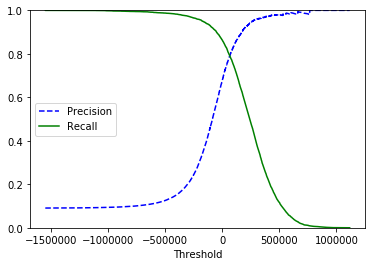

In [52]:
plot_precision_recall(precision, recalls, threshold)
plt.show()

In [53]:
y_train_pred_90 = (y_scores > 70000)
y_train_pred_90

array([False, False, False, ..., False, False, False], dtype=bool)

In [54]:
precision_score(y_train_5, y_train_pred_90)

0.79570895522388063

In [55]:
recall_score(y_train_5, y_train_pred_90)

0.78675521121564285

### ROC Curve (Receiver Operating Characteristic)

In [56]:
from sklearn.metrics import roc_curve

In [57]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

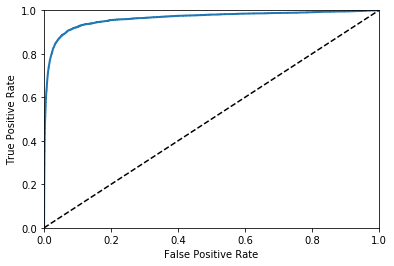

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.96336540397759307

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
forest_clf = RandomForestClassifier(random_state=4)

In [62]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [63]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

In [64]:
fpr_forest, tpr_forest, throsholds_forest = roc_curve(y_train_5, y_scores_forest)

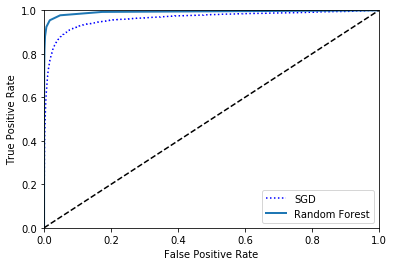

In [65]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')

In [66]:
roc_auc_score(y_train_5, y_scores_forest)

0.99250134413354352

### Multiclass Classification

In [67]:
sgd_clf.fit(X_train, y_train)

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [68]:
sgd_clf.predict([some_digit])

array([ 5.])

In [69]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [70]:
some_digit_scores

array([[ -97263.41764408, -465462.6548416 , -199375.8209318 ,
        -163088.64827156, -371225.50433045,   -2821.24151246,
        -804776.61302915, -374370.56309091, -644453.27570076,
        -476718.5777011 ]])

In [71]:
np.argmax(some_digit_scores)

5

In [72]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [73]:
sgd_clf.classes_[5]

5.0

In [74]:
from sklearn.multiclass import OneVsOneClassifier

In [75]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [76]:
ovo_clf.fit(X_train, y_train)

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [77]:
ovo_clf.predict([some_digit])

array([ 5.])

In [78]:
len(ovo_clf.estimators_)

45

In [79]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False)

In [80]:
forest_clf.predict([some_digit])

array([ 5.])

In [81]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0. ,  0.2,  0. ,  0.7,  0. ,  0. ,  0. ,  0.1]])

In [82]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(

array([ 0.87457508,  0.83659183,  0.86612992])

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [86]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(

array([ 0.91036793,  0.9079954 ,  0.91108666])

### Error Analysis

##### Grid Search

In [87]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/fjcamillo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(

In [88]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5730,    2,   22,   13,   11,   56,   43,    7,   36,    3],
       [   2, 6486,   48,   28,    5,   38,    9,   13,  102,   11],
       [  51,   36, 5329,  117,   86,   25,   87,   55,  157,   15],
       [  50,   38,  138, 5347,    4,  228,   34,   51,  138,  103],
       [  21,   26,   33,    8, 5364,   10,   55,   29,   89,  207],
       [  67,   44,   33,  191,   73, 4628,  107,   26,  158,   94],
       [  37,   27,   47,    2,   51,   88, 5615,    6,   45,    0],
       [  27,   21,   77,   31,   58,   11,    7, 5789,   18,  226],
       [  52,  153,   70,  159,   10,  162,   60,   24, 5016,  145],
       [  41,   32,   28,   86,  166,   34,    3,  195,   79, 5285]])

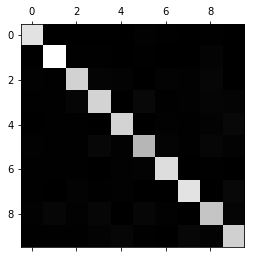

In [89]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [90]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [91]:
norm_conf_mx = conf_mx / row_sums

In [92]:
np.fill_diagonal(norm_conf_mx, 0)

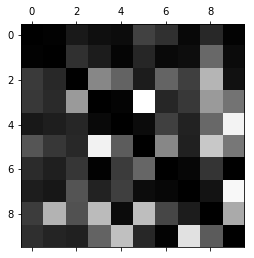

In [93]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [94]:
cl_a, cl_b = 3 ,5

In [95]:
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [96]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

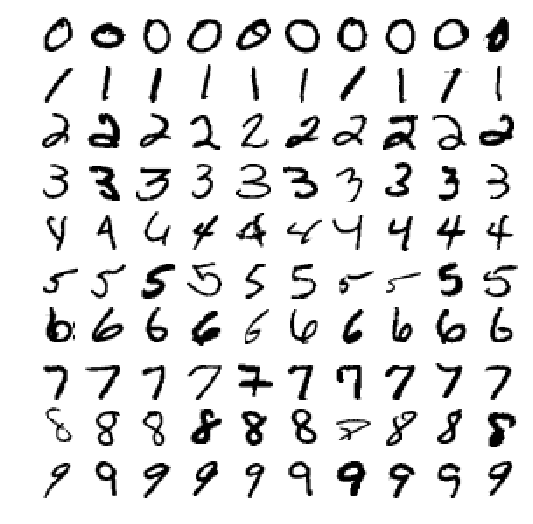

In [97]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

###  Multilabel Classification

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

In [100]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [101]:
y_multilabel

array([[False, False],
       [False,  True],
       [False, False],
       ..., 
       [False, False],
       [False, False],
       [ True, False]], dtype=bool)

In [102]:
knn_clf = KNeighborsClassifier().fit(X_train, y_multilabel)

In [103]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [104]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [105]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.97764166375899197

### Multioutput Classification

In [106]:
noise = np.random.randint(0, 100, (len(X_train), 784))

In [107]:
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [108]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

NameError: name 'some_index' is not defined